<h1>Phase 3: DAX 30 GARCH Calibration and Volatility Assessment<h1>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import datetime as dt
from datetime import timedelta
import yfinance as yf
import statsmodels.api as sm
from arch import arch_model
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.stats.diagnostic import acorr_ljungbox

In [3]:
sns.set_style("whitegrid")

plt.rc("figure", figsize=(16, 8))
plt.rc("savefig", dpi=90)
plt.rc("font", family="sans-serif")
plt.rc("font", size=14)

In [4]:
tickers = ['^GDAXI']
start_date = '2007-01-01'
end_date = '2009-01-01'

data = yf.download(tickers, start=start_date, end=end_date)

[*********************100%%**********************]  1 of 1 completed


In [5]:
returns = 100 * data.Close.ffill().pct_change().dropna()
squared_returns = returns ** 2

Text(0.5, 1.0, '^GDAXI Returns')

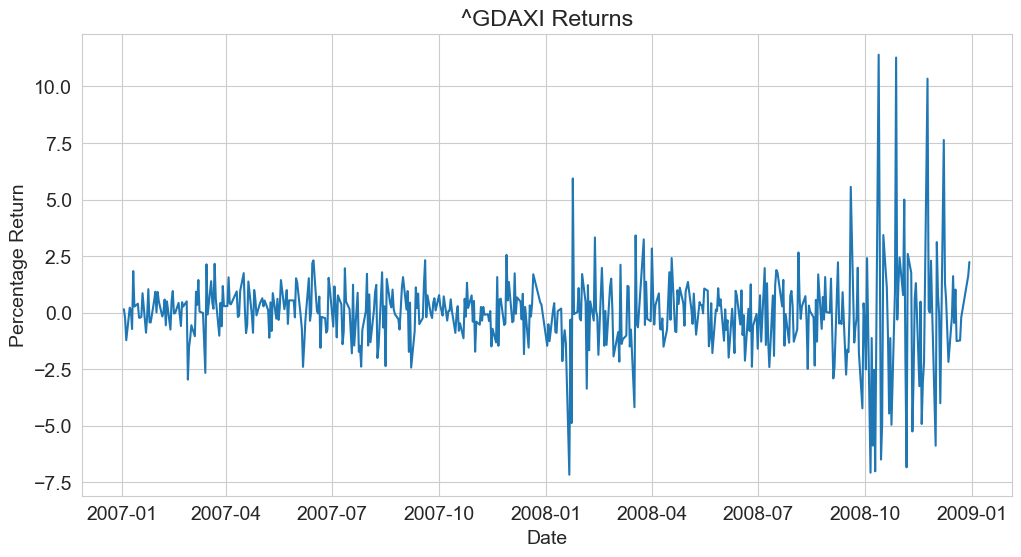

In [6]:
plt.figure(figsize=(12,6))
plt.plot(returns)
plt.ylabel('Percentage Return')
plt.xlabel('Date')
plt.title('^GDAXI Returns')

# Section A: Exploratory Data Analysis (EDA)

## ACF and PACF (Returns)

In [7]:
# ACF up to 20 lags
acf_result = sm.tsa.acf(returns, nlags=20)

chosen_lags = [1, 5, 10, 15, 20]
acf_chosen_lags_1 = [acf_result[lag] for lag in chosen_lags]

for lag, acf_value in zip(chosen_lags, acf_chosen_lags_1):
    print(f"ACF at lag {lag}: {acf_value}")

ACF at lag 1: -0.05551904379389178
ACF at lag 5: -0.0880059212826985
ACF at lag 10: 0.11754802587442423
ACF at lag 15: -0.05996526975450128
ACF at lag 20: 0.03427378706443833


In [8]:
# PACF up to 20 lags
pacf_result = sm.tsa.pacf(returns, nlags=20, method='ols')

pacf_chosen_lags_1 = [pacf_result[lag] for lag in chosen_lags]

for lag, pacf_value in zip(chosen_lags, pacf_chosen_lags_1):
    print(f"PACF at lag {lag}: {pacf_value}")

PACF at lag 1: -0.055691808404569706
PACF at lag 5: -0.09022575259502401
PACF at lag 10: 0.09267066070820076
PACF at lag 15: -0.06553576980238188
PACF at lag 20: 0.009932316437358715


## ACF and PACF (Squared returns)

In [9]:
acf_result_squared = sm.tsa.acf(squared_returns, nlags=20)

chosen_lags = [1, 5, 10, 15, 20]
acf_chosen_lags = [acf_result_squared[lag] for lag in chosen_lags]

for lag, acf_value in zip(chosen_lags, acf_chosen_lags):
    print(f"ACF at lag {lag}: {acf_value}")

ACF at lag 1: 0.14496532986000057
ACF at lag 5: 0.27553715922921573
ACF at lag 10: 0.2004638000513889
ACF at lag 15: 0.028740912297739642
ACF at lag 20: 0.019326481615900924


In [10]:
pacf_result_squared = sm.tsa.pacf(squared_returns, nlags=20, method='ols')

pacf_chosen_lags = [pacf_result_squared[lag] for lag in chosen_lags]

for lag, pacf_value in zip(chosen_lags, pacf_chosen_lags):
    print(f"PACF at lag {lag}: {pacf_value}")

PACF at lag 1: 0.14497147997400217
PACF at lag 5: 0.20294836878950287
PACF at lag 10: 0.07566053190706513
PACF at lag 15: -0.073668146928876
PACF at lag 20: -0.1583401049465708


## Ljung Box Q-Test (Returns and Squared Returns)

In [11]:
# Ljung-Box test on returns
lb_test_returns = acorr_ljungbox(returns, lags=20)
print('Results for original returns:', lb_test_returns)
print('--------------------------------------------------------')
# Ljung-Box test on squared returns
lb_test_squared_returns = acorr_ljungbox(squared_returns, lags=20)
print('Results for squared returns:', lb_test_squared_returns)

Results for original returns:       lb_stat  lb_pvalue
1    1.565859   0.210809
2    5.665190   0.058860
3    7.473996   0.058230
4   12.735926   0.012641
5   16.701930   0.005101
6   17.383237   0.007973
7   17.455496   0.014684
8   17.858751   0.022311
9   20.301233   0.016142
10  27.448250   0.002211
11  28.794588   0.002443
12  28.849957   0.004147
13  29.112101   0.006310
14  30.334544   0.006862
15  32.213441   0.006021
16  33.585305   0.006176
17  33.798650   0.008913
18  38.447318   0.003378
19  40.904943   0.002485
20  41.525072   0.003188
--------------------------------------------------------
Results for squared returns:        lb_stat     lb_pvalue
1    10.675718  1.085510e-03
2    36.145777  1.415938e-08
3    60.077857  5.657347e-13
4    67.732146  6.832104e-14
5   106.608872  2.132305e-21
6   107.939260  5.503600e-21
7   128.952162  1.040436e-24
8   132.543968  8.396246e-25
9   161.582778  3.482293e-30
10  182.368545  7.549196e-34
11  231.157103  2.432513e-43
12  250.747

## ACF and PACF Plots

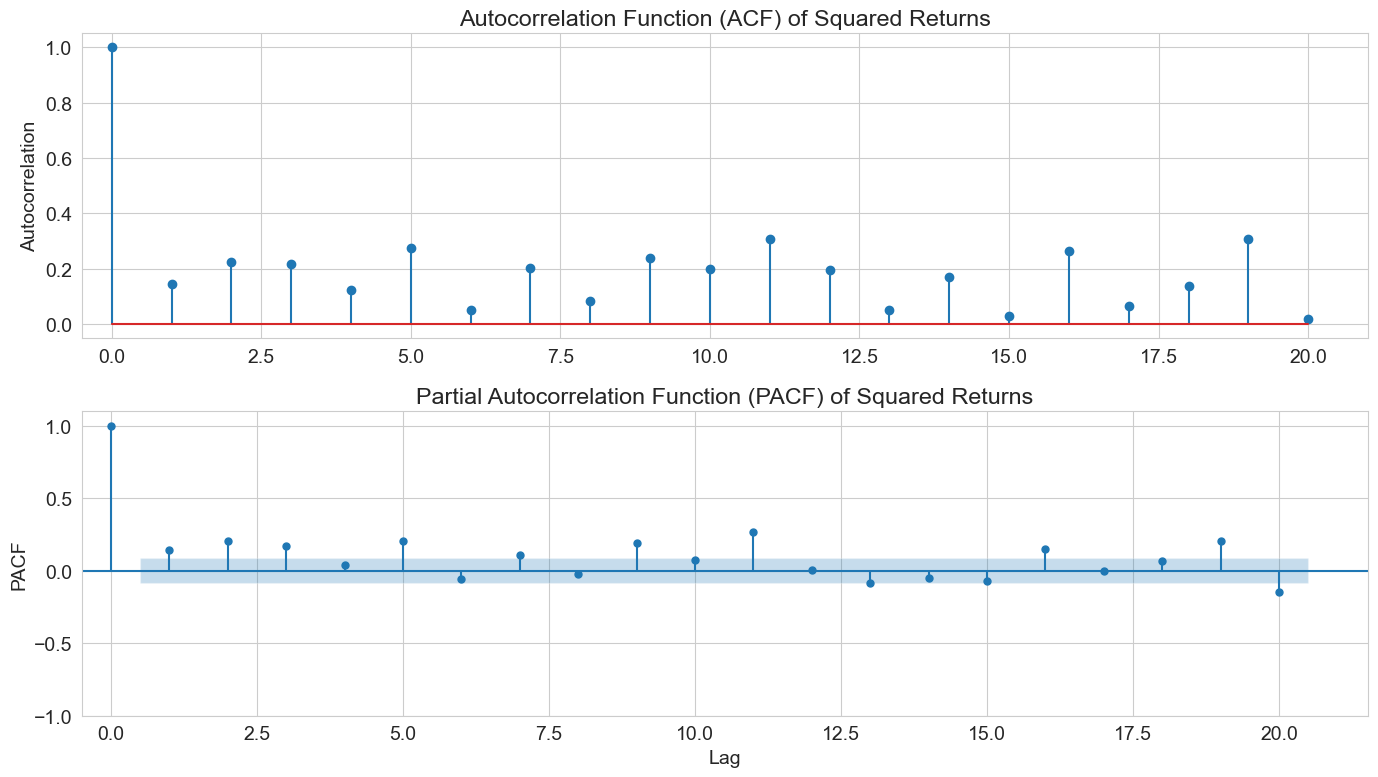

In [12]:
fig, ax = plt.subplots(2, 1, figsize=(14, 8), sharex=False)

#ACF of Squared returns
acf_result = sm.tsa.acf(squared_returns, nlags=20)  # Calculate ACF up to 20 lags
ax[0].stem(range(len(acf_result)), acf_result)
ax[0].set_title('Autocorrelation Function (ACF) of Squared Returns')
ax[0].set_ylabel('Autocorrelation')
ax[0].set_xlim(-0.5)

# PACF of squared returns
plot_pacf(squared_returns, ax=ax[1], lags=20)  # Limit to 20 lags
ax[1].set_title('Partial Autocorrelation Function (PACF) of Squared Returns')
ax[1].set_xlabel('Lag')
ax[1].set_ylabel('PACF')
ax[1].set_xlim(-0.5)
ax[1].set_ylim(-1, 1.1)

plt.tight_layout()
plt.savefig('GDAXI_acf_pacf_figure.png')
plt.show()

## LM ARCH(10) Test on Returns and Squared Returns

In [69]:
# returns
model_returns = arch_model(returns, vol='ARCH', mean='Zero')
results_returns = model_returns.fit(disp='off')
lm_test_returns = results_returns.arch_lm_test(lags=10)
print("LM ARCH test on returns:")
print(lm_test_returns)
print("----------------------------------------------------")

# squared returns
model_squared_returns = arch_model(squared_returns, vol='ARCH', mean='Zero')
results_squared_returns = model_squared_returns.fit(disp='off')
lm_test_squared_returns = results_squared_returns.arch_lm_test(lags=11)
print("LM ARCH test on squared returns:")
print(lm_test_squared_returns)

LM ARCH test on returns:
ARCH-LM Test
H0: Residuals are homoskedastic.
ARCH-LM Test
H1: Residuals are conditionally heteroskedastic.
Statistic: 89.7680
P-value: 0.0000
Distributed: chi2(10)
----------------------------------------------------
LM ARCH test on squared returns:
ARCH-LM Test
H0: Residuals are homoskedastic.
ARCH-LM Test
H1: Residuals are conditionally heteroskedastic.
Statistic: 71.0606
P-value: 0.0000
Distributed: chi2(11)


# Section B: Calibration of GARCH(1,1) Models

In [14]:
# Create t-GARCH model
model_t = arch_model(returns, p=1, q=1, vol='Garch', dist='t')
model_n = arch_model(returns, p=1, q=1, vol='Garch')
model_skt = arch_model(returns, p=1, q=1, vol='Garch', dist='skewt')

In [15]:
model_fit_t = model_t.fit()
print("---------------------------------------------------------------------------")
model_fit_n = model_n.fit()
print("---------------------------------------------------------------------------")
model_fit_skt = model_skt.fit()

Iteration:      1,   Func. Count:      7,   Neg. LLF: 29738.51097354263
Iteration:      2,   Func. Count:     16,   Neg. LLF: 16299.233907993515
Iteration:      3,   Func. Count:     25,   Neg. LLF: 988.9389088106885
Iteration:      4,   Func. Count:     33,   Neg. LLF: 872.6868289742463
Iteration:      5,   Func. Count:     40,   Neg. LLF: 869.3257082998762
Iteration:      6,   Func. Count:     47,   Neg. LLF: 877.4357073127342
Iteration:      7,   Func. Count:     54,   Neg. LLF: 869.0998237474835
Iteration:      8,   Func. Count:     60,   Neg. LLF: 869.099652692559
Iteration:      9,   Func. Count:     66,   Neg. LLF: 869.0996164115213
Iteration:     10,   Func. Count:     72,   Neg. LLF: 869.0996131110435
Iteration:     11,   Func. Count:     77,   Neg. LLF: 869.0996131110434
Optimization terminated successfully    (Exit mode 0)
            Current function value: 869.0996131110435
            Iterations: 11
            Function evaluations: 77
            Gradient evaluations: 11

In [16]:
print(model_fit_t.summary())
print("------------------------------------------------------------------------------------")
print(model_fit_n.summary())
print("------------------------------------------------------------------------------------")
print(model_fit_skt.summary())

                        Constant Mean - GARCH Model Results                         
Dep. Variable:                        Close   R-squared:                       0.000
Mean Model:                   Constant Mean   Adj. R-squared:                  0.000
Vol Model:                            GARCH   Log-Likelihood:               -869.100
Distribution:      Standardized Student's t   AIC:                           1748.20
Method:                  Maximum Likelihood   BIC:                           1769.32
                                              No. Observations:                  505
Date:                      Tue, Apr 02 2024   Df Residuals:                      504
Time:                              23:06:02   Df Model:                            1
                                 Mean Model                                
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
mu     

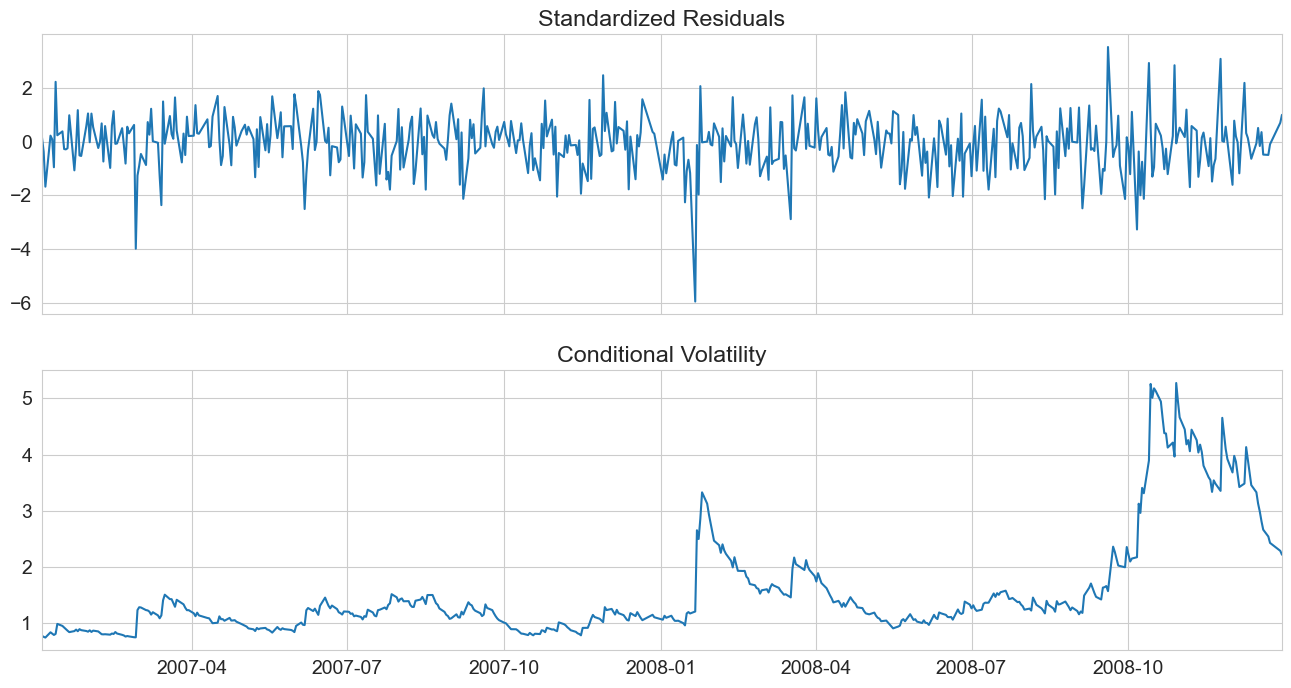

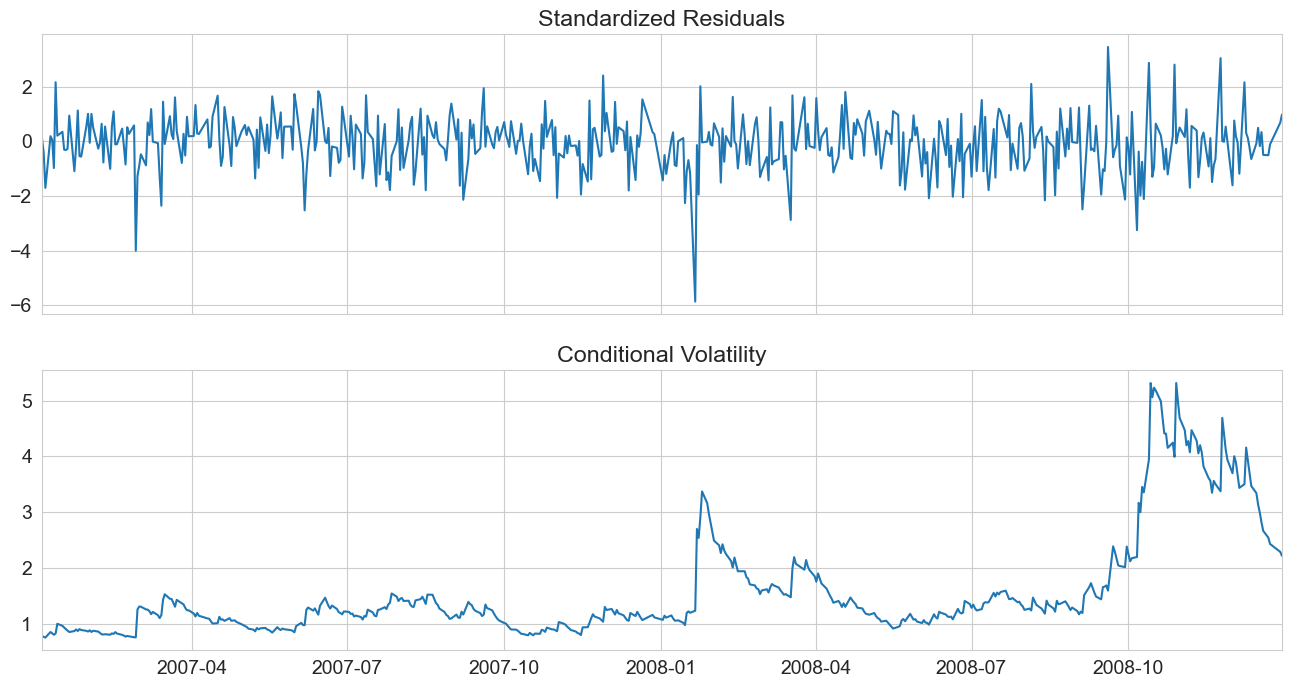

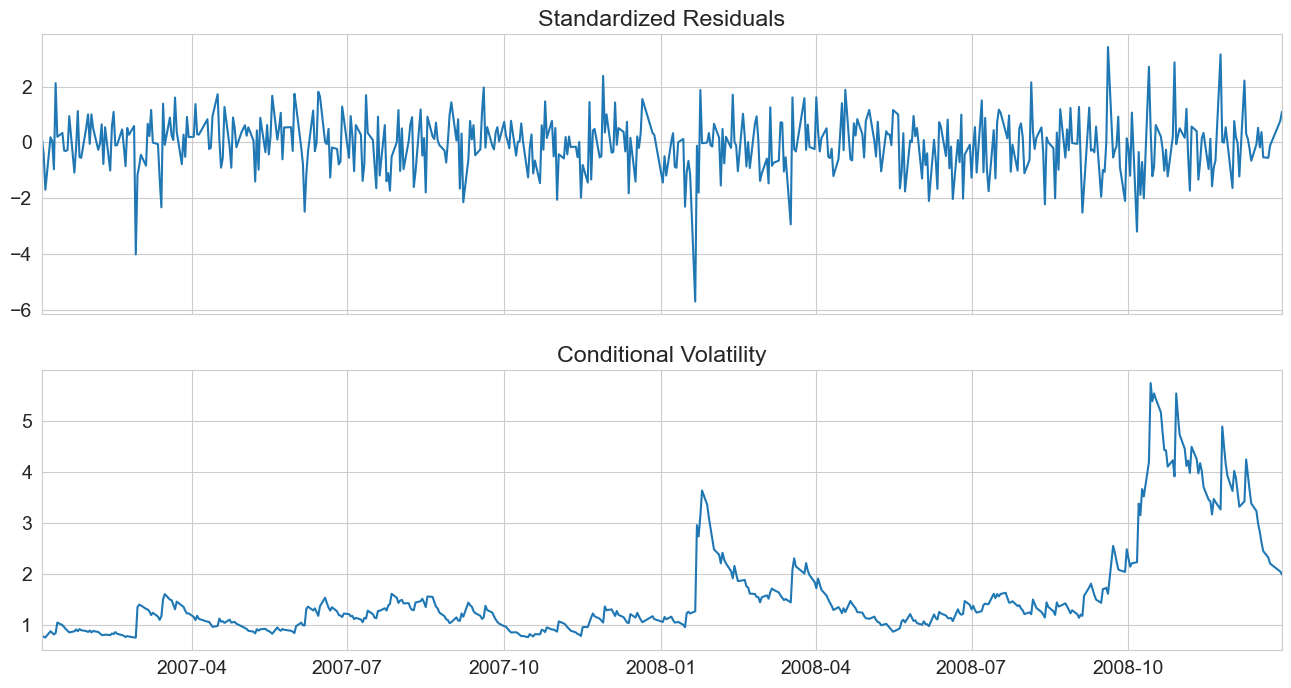

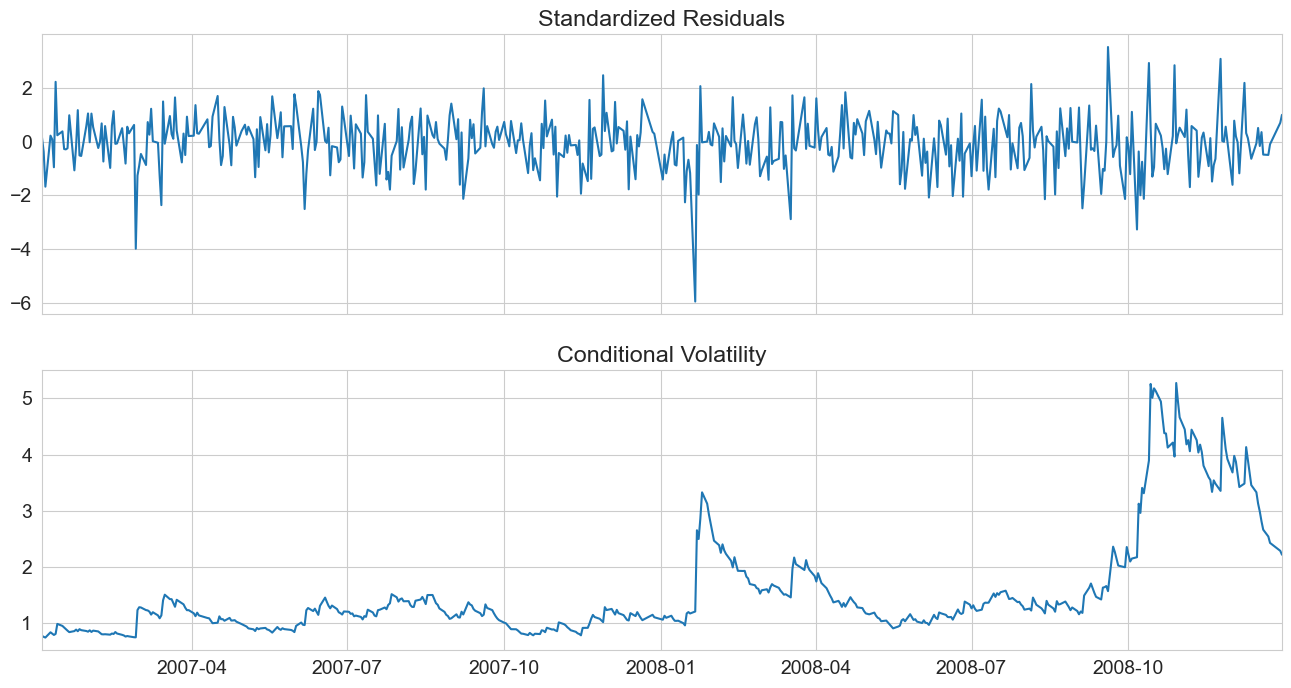

In [19]:
model_fit_t.plot()
model_fit_n.plot()
model_fit_skt.plot()

In [20]:
# Extract standardized residuals from each model fit
std_resid_t = model_fit_t.resid / model_fit_t.conditional_volatility
std_resid_n = model_fit_n.resid / model_fit_n.conditional_volatility
std_resid_skt = model_fit_skt.resid / model_fit_skt.conditional_volatility

# Calculate squared standardized residuals
sqrd_std_resid_t = std_resid_t ** 2
sqrd_std_resid_n = std_resid_n ** 2
sqrd_std_resid_skt = std_resid_skt ** 2

# Section C: Residual Based Diagnostics (RBD)

## Engle ARCH Test

In [21]:
# Combine squared standardized residuals into a DataFrame
sqrd_std_resid_df = pd.DataFrame({
    't-distribution': sqrd_std_resid_t,
    'normal distribution': sqrd_std_resid_n,
    'skew-t distribution': sqrd_std_resid_skt
})

# Perform Engle's ARCH test for each model
for model_name, squared_resid in sqrd_std_resid_df.items():
    arch_model_obj = arch_model(squared_resid, vol='ARCH', mean='Zero')
    arch_results = arch_model_obj.fit(update_freq=0)
    print(f"Engle's ARCH Test for {model_name}:")
    print(arch_results.arch_lm_test(lags=10))

Optimization terminated successfully    (Exit mode 0)
            Current function value: 1160.9976859395902
            Iterations: 8
            Function evaluations: 26
            Gradient evaluations: 8
Engle's ARCH Test for t-distribution:
ARCH-LM Test
H0: Residuals are homoskedastic.
ARCH-LM Test
H1: Residuals are conditionally heteroskedastic.
Statistic: 0.3093
P-value: 1.0000
Distributed: chi2(10)
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1151.256349621873
            Iterations: 10
            Function evaluations: 29
            Gradient evaluations: 9
Engle's ARCH Test for normal distribution:
ARCH-LM Test
H0: Residuals are homoskedastic.
ARCH-LM Test
H1: Residuals are conditionally heteroskedastic.
Statistic: 0.3915
P-value: 1.0000
Distributed: chi2(10)
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1169.7497931249463
            Iterations: 10
            Function evaluations: 29
  

## Box Pierce Test (Lag 20)

### Standardised residuals (t, normal, skewt)

In [22]:
# Perform the Box-Pierce test for 20 lags on each model fit
bp_t = acorr_ljungbox(std_resid_t, lags=20, boxpierce=True)
bp_n = acorr_ljungbox(std_resid_n, lags=20, boxpierce=True)
bp_skt = acorr_ljungbox(std_resid_skt, lags=20, boxpierce=True)

# Print Box-Pierce test results
print("Box-Pierce Test Results (Student t (EHS)):")
print(bp_t)
print('-------------------------------------------------------------')
print("\nBox-Pierce Test Results (Normal):")
print(bp_n)
print('-------------------------------------------------------------')
print("\nBox-Pierce Test Results (Skewed t):")
print(bp_skt)

Box-Pierce Test Results (Student t (EHS)):
      lb_stat  lb_pvalue    bp_stat  bp_pvalue
1    0.289007   0.590858   0.287297   0.591958
2    1.644531   0.439435   1.632127   0.442169
3    2.646402   0.449413   2.624117   0.453277
4    4.027838   0.402252   3.989205   0.407469
5    7.107561   0.212763   7.026407   0.218684
6    7.285463   0.295253   7.201502   0.302614
7    7.288449   0.399477   7.204435   0.407909
8    7.875068   0.445768   7.779484   0.455302
9    7.908781   0.543364   7.812465   0.553150
10  10.548623   0.393747  10.389826   0.406983
11  11.187337   0.427705  11.012162   0.442245
12  11.981690   0.447151  11.784580   0.463132
13  12.060477   0.522691  11.861037   0.539071
14  12.643587   0.554760  12.425744   0.572153
15  14.649379   0.476955  14.364281   0.498100
16  15.109737   0.516616  14.808295   0.538722
17  15.128324   0.586239  14.826186   0.608000
18  15.594294   0.620838  15.273774   0.643091
19  15.970804   0.659225  15.634689   0.681495
20  15.970879   0

### Squared standardised Residuals (t, normal, skewt)

In [23]:
# Perform the Box-Pierce test for 20 lags on each model fit
sq_bp_t = acorr_ljungbox(sqrd_std_resid_t, lags=20, boxpierce=True)
sq_bp_n = acorr_ljungbox(sqrd_std_resid_n, lags=20, boxpierce=True)
sq_bp_skt = acorr_ljungbox(sqrd_std_resid_skt, lags=20, boxpierce=True)

# Print Box-Pierce test results
print("Box-Pierce Test Results (Student t (EHS)):")
print(sq_bp_t)
print('-------------------------------------------------------------')
print("\nBox-Pierce Test Results (Normal):")
print(sq_bp_n)
print('-------------------------------------------------------------')
print("\nBox-Pierce Test Results (Skewed t):")
print(sq_bp_skt)

Box-Pierce Test Results (Student t (EHS)):
      lb_stat  lb_pvalue    bp_stat  bp_pvalue
1    0.294064   0.587628   0.292324   0.588735
2    0.531988   0.766444   0.528371   0.767831
3    1.060083   0.786718   1.051257   0.788852
4    2.975800   0.561883   2.944303   0.567189
5    2.975897   0.703702   2.944399   0.708558
6    3.407667   0.756211   3.369357   0.761262
7    3.489013   0.836388   3.449258   0.840570
8    5.432355   0.710522   5.354270   0.719127
9    5.457309   0.792762   5.378683   0.800128
10   5.611071   0.846813   5.528805   0.853177
11  13.601175   0.255853  13.314035   0.273297
12  13.865115   0.309405  13.570686   0.328959
13  13.865397   0.383391  13.570961   0.404737
14  14.698184   0.399092  14.377466   0.421985
15  15.321932   0.428486  14.980299   0.452837
16  19.641891   0.236784  19.146887   0.261120
17  20.344017   0.257013  19.822701   0.283398
18  21.322405   0.263460  20.762493   0.291564
19  21.324816   0.319134  20.764805   0.349941
20  21.393759   0

# Section D: Testing Phase (Out of Sample)

In [27]:
tickers = '^GDAXI'
oos_start_date = '2009-01-01'
oos_end_date = '2011-01-01'
oos_data = yf.download(tickers, start=oos_start_date, end=oos_end_date)

[*********************100%%**********************]  1 of 1 completed


In [65]:
oos_returns = 1000 * oos_data['Close'].ffill().pct_change().dropna()

In [66]:
oos_rolling_predictions = []

for i in range(len(oos_returns)):
    test = oos_returns[:i]
    if len(test) > 1:  
        test = test.dropna()  
        model = arch_model(test, p=1, q=1, dist='t')
        model_fit = model.fit(disp='off')
        pred = model_fit.forecast(horizon=1)
        oos_rolling_predictions.append(np.sqrt(pred.variance.values[-1, :][0]))
    else:
        oos_rolling_predictions.append(np.nan)  

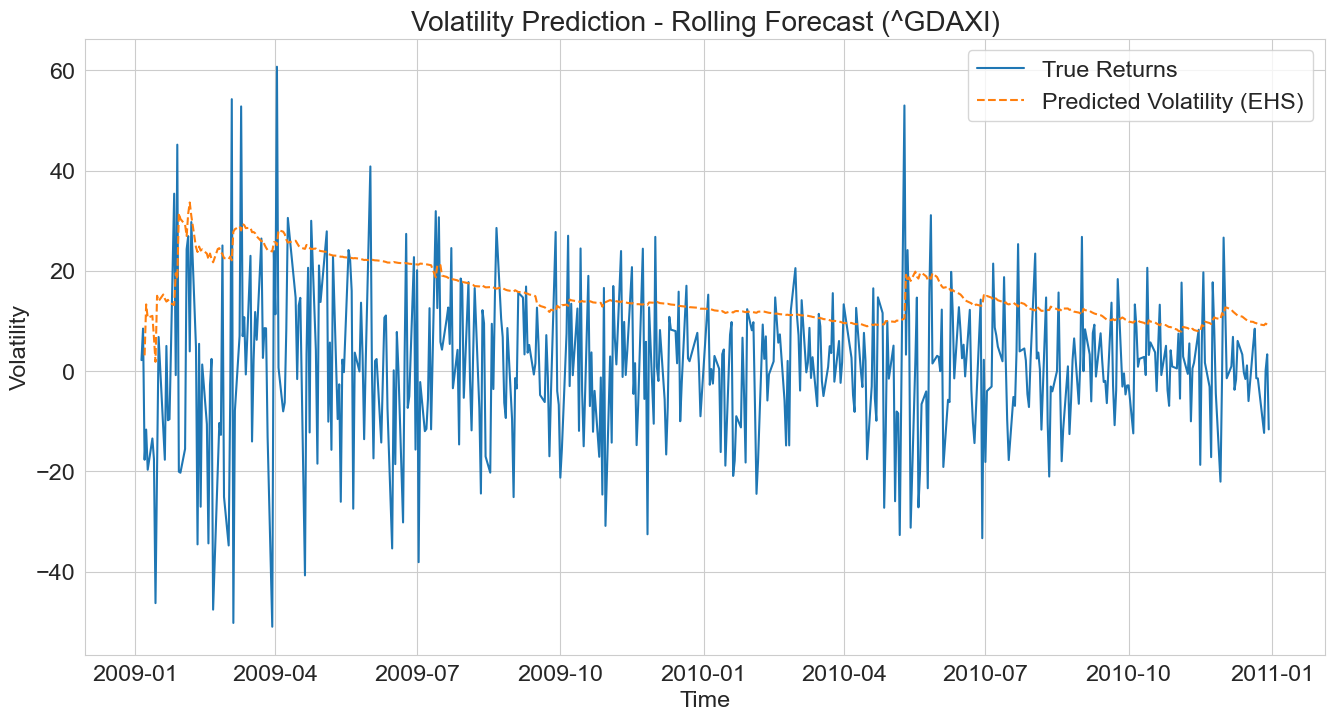

In [68]:
plt.plot(oos_returns[-len(oos_rolling_predictions):].index, oos_returns[-len(oos_rolling_predictions):])
plt.plot(oos_returns[-len(oos_rolling_predictions):].index, oos_rolling_predictions, linestyle='--')
plt.title('Volatility Prediction - Rolling Forecast (^GDAXI)')
plt.xlabel('Time')
plt.ylabel('Volatility')
plt.legend(['True Returns', 'Predicted Volatility (EHS)'])
plt.savefig('OOS_Rolling_Window_GDAXI.png')
plt.show()